In [1]:
import numpy as np
import cv2
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import pandas as pd 

import os

In [2]:
# modified plot rigaku scattering 

class RigakuReader():
    def __init__(self, file):
        self.file = file
    
    def load(self):
        with open(self.file, 'r') as f:
            a = np.fromfile(f, dtype=np.uint64)

            # pixel index, pixel count, pixel frame
            b = (a >> 5+11)
            pix_ind = (b & 2**21-1).astype(int)
            pix_count = (a & 2**12-1).astype(int)
            pix_frame = (a >> 64-24).astype(int)
            
            img = csr_matrix((pix_count, (pix_frame, pix_ind)), shape=(max(pix_frame)+1, 1024*512), dtype='float')
            img_2D = np.transpose(img.mean(axis=0).reshape(512,1024))
        return img_2D  
    
    # regular plot
    def plot(self, img_2D):
        
        img_2D = np.array(img_2D)
        fig, ax = plt.subplots()
        ax.pcolor(img_2D, norm=colors.LogNorm(vmin=1e-5, vmax=0.5))
        plt.imshow(img_2D)
        plt.colorbar()
    
    # save png
    def save_img(self, img_2D, path):
        
        img_2D = np.array(img_2D)
        fig, ax = plt.subplots()
        ax.pcolor(img_2D, norm=colors.LogNorm(vmin=1e-5, vmax=0.5))
        plt.axis('off') 
        plt.imshow(img_2D)
        plt.savefig(path ,bbox_inches='tight',pad_inches=0)
        

In [3]:
#file = '/Users/jeffr/Desktop/data/F0014_10nm_Glass_006C_att00_Rq0_00001/F0014_10nm_Glass_006C_att00_Rq0_00001.bin'
file = '/Users/jeffr/Desktop/data/E0004_D100_006C_att00_Rq0_00001/E0004_D100_006C_att00_Rq0_00001.bin'


root, _ = os.path.split(file) 
path = root + '/'+ 'img_kmeans.png'


In [4]:
reader = RigakuReader(file)
img_2D = reader.load()

In [5]:
orig_dim = img_2D.shape
print(img_2D.shape)

(1024, 512)


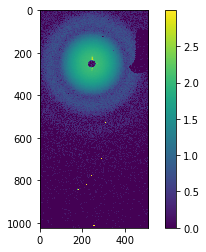

In [6]:
reader.plot(img_2D)

[[2.e-05 3.e-05 2.e-05 ... 0.e+00 1.e-05 0.e+00]
 [1.e-05 0.e+00 0.e+00 ... 1.e-05 2.e-05 0.e+00]
 [2.e-05 0.e+00 2.e-05 ... 1.e-05 1.e-05 0.e+00]
 ...
 [0.e+00 0.e+00 0.e+00 ... 0.e+00 2.e-05 0.e+00]
 [0.e+00 0.e+00 0.e+00 ... 0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00 ... 0.e+00 0.e+00 1.e-05]]


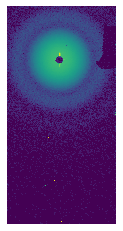

In [7]:
reader.save_img(img_2D, path)

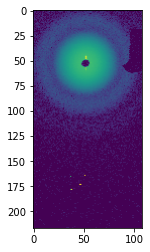

In [8]:
img = cv2.imread(path)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [9]:
red_dim = img.shape
print(red_dim)

(217, 108, 3)


In [10]:
# Reshaping the image into a 2D array of pixels and 3 color values (RGB)
pixel_vals = img.reshape((-1,3))
 
# Convert to float type
pixel_vals = np.float32(pixel_vals)

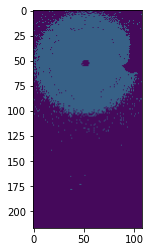

In [11]:
# criteria for stopping: 100 iterations or 85% accuracy,
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
 
# random centroids, k clusters
k = 2
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 20, cv2.KMEANS_RANDOM_CENTERS)

# convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]
    
# reshape data 
segmented_image = segmented_data.reshape((img.shape))


plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB)) 

In [12]:
print(centers)

# [133  69  62] -- > more dominant color
# [141 120  41] --> other

[[ 91   9  69]
 [135  97  55]]


In [15]:
factor = orig_dim[0]/red_dim[0]
print(factor)

4.71889400921659


In [16]:
c = centers[0]
indices = np.where(np.all(segmented_image == c, axis=-1))
#print (indices)

ty = int(sum(indices[0])/len(indices[0]))
tx = int(sum(indices[1])/len(indices[1]))


print(ty,tx)

136 55


In [17]:
tx = tx * factor
ty = ty * factor 

print("Shadow Guess: (x,y): ", tx, ty)

Shadow Guess: (x,y):  259.53917050691246 641.7695852534562


In [18]:
c = centers[1]
indices = np.where(np.all(segmented_image == c, axis=-1))
#print (indices)

ty = int(sum(indices[0])/len(indices[0]))
tx = int(sum(indices[1])/len(indices[1]))


print(ty,tx)

53 50


In [65]:
tx = tx * factor
ty = ty * factor 

print("Shadow Guess: (x,y): ", tx, ty)

Shadow Guess: (x,y):  259.53917050691246 679.520737327189


In [66]:
c = centers[2]
indices = np.where(np.all(segmented_image == c, axis=-1))
#print (indices)

ty = int(sum(indices[0])/len(indices[0]))
tx = int(sum(indices[1])/len(indices[1]))


print(ty,tx)

59 50


In [67]:
tx = tx * factor
ty = ty * factor 

print("Shadow Guess: (x,y): ", tx, ty)

Shadow Guess: (x,y):  235.9447004608295 278.4147465437788
